In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Confidence intervals using the normal distribution

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


C:\Users\Tacettin\AppData\Local\Temp\ipykernel_13476\4028607404.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="day", y="total_bill", data=tips, ci=95)


<AxesSubplot: xlabel='day', ylabel='total_bill'>

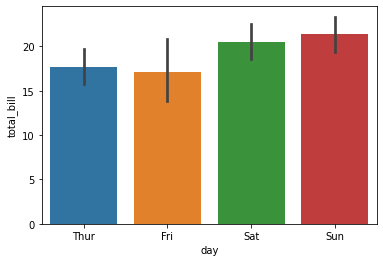

In [11]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95) 

In [12]:
tipsFri =tips[tips["day"] == "Fri"]
tipsFri.head()

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2


In [15]:
xbar = tipsFri.total_bill.mean()
xbar

17.15157894736842

In [16]:
tipsFri.shape

(19, 7)

In [19]:
sem = tipsFri.total_bill.sem()

In [20]:
tipsFri.total_bill.std() / np.sqrt(len(tipsFri))  # sem in hesaplanması

1.9047607734794163

In [21]:
moe = 1.96 * sem
moe

3.733331116019656

In [22]:
upper = xbar + moe
upper

20.884910063388077

In [23]:
lower = xbar - moe
lower

13.418247831348765

In [24]:
stats.norm.interval(0.95, loc=xbar, scale=sem)

(13.41831643218411, 20.884841462552732)

In [26]:
stats.norm.interval(0.95, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())   # tek satırda yazımı

(13.41831643218411, 20.884841462552732)

In [28]:
stats.t.interval(0.95, df = len(tipsFri)-1, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())  # t dağılımı ile çözümü

(13.149825056979097, 21.153332837757745)

In [29]:
tipsSun =tips[tips["day"] == "Sun"]
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
len(tipsSun)

76

In [31]:
stats.t.interval(0.95, df = len(tipsSun)-1, loc=tipsSun.total_bill.mean(), scale=tipsSun.total_bill.sem())  # t dağılımı ile çözümü

(19.39177370652103, 23.42822629347897)

In [32]:
xbar = tipsSun.total_bill.mean()
xbar

21.41

In [33]:
std = tipsSun.total_bill.std()
std

8.832121828869889

In [35]:
sem = std / np.sqrt(len(tipsSun))
sem

1.0131138555021968

In [34]:
sem = tipsSun.total_bill.sem()
sem

1.0131138555021968

In [ ]:
moe = 